### life cycle of machine learning project
- understanding the problem statement
- data collection
- data checks to perfrom
- exploratory data analysis
- data pre processing
- model training
- chose best model 

### Problem statement 
- This project understands how the students performance (test_scores ) is effects by other variables such as gender . ethinicity , parental level of education . lunch and test prepration course . 

####  1  = Data collection 
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

In [1]:
#import data and requiret pacakages 

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [3]:
#import the csv data as pandas Dataframe 

In [4]:
df = pd.read_csv('StudentsPerformance.csv')

In [7]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
#shape 

df.shape

(1000, 8)

#### 2 = Data set information
- gender - sex of students - male/female
- race/ethnicity:: ethinicity of students - group a,b,c,d,e
- parental level of education ::: parent education - bachelors degreee , some colege master degree , associate degree , high school
- lunch: having lunch before test (standard or free comopplete before test )
- math score
- reading scoore
- writing score 

#### = Data check to perform
- check mising values
- check dubplicates
- check data type
- chech the number of unique values of each column
- check statistics of data set
- cehc kvarious categories present in the different categorcial column

In [9]:
#missing values 

df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

######  there is no missing values 

In [10]:
#check duplicates 

df.duplicated().sum()

0

###### there is no duplicates values in the data set

In [11]:
#check data types 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [13]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [14]:
#checking the number of unique value of each column

df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [15]:
#check the stats of the dataset
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


###### 
-  from above description of numerical data, all means are very close to each     other 66 ,69 , 68
- all std deviation is also nearby  , between 14.6 to 15.19
- while there is a minimum score 0 for math , for writing minimum is much higher that is 10 and for reading is more hight 17 


### 3 = EDA

In [16]:
df.head(1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74


In [17]:
print('1 = = categories in "gender" variable : ' , end = '')
print(df['gender'].unique())

print('2 = = categories in "race/ethnicity : ' , end = '')
print(df['race/ethnicity'].unique())


print('3 = = parental level of education : ' , end = '')
print(df['parental level of education'].unique())

print('4 = = lunch : ' , end = '')
print(df['lunch'].unique())

print('5  = = test preparation course : ' , end = '')
print(df['test preparation course'].unique())


1 = = categories in "gender" variable : ['female' 'male']
2 = = categories in "race/ethnicity : ['group B' 'group C' 'group A' 'group D' 'group E']
3 = = parental level of education : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
4 = = lunch : ['standard' 'free/reduced']
5  = = test preparation course : ['none' 'completed']


In [18]:
#define numerical and catergorical coloumn
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


## Adding columns for total score and averages

In [20]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [24]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

print(reading_full)
print(writing_full)
print(math_full)

17
14
7


In [49]:
df.count()

gender                         1000
race/ethnicity                 1000
parental level of education    1000
lunch                          1000
test preparation course        1000
math score                     1000
reading score                  1000
writing score                  1000
total score                    1000
average                        1000
dtype: int64

In [25]:
df[df['reading score'] <= 20].count()

gender                         1
race/ethnicity                 1
parental level of education    1
lunch                          1
test preparation course        1
math score                     1
reading score                  1
writing score                  1
total score                    1
average                        1
dtype: int64

In [54]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')


Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


##### insights 
- fromabove values we get student have performed the worst in math

### 4 -  Exploring data  (visualization )

#### visualize average score distribution to make some conclusion 
- histogram
- kernal dsitribution function (KDE)

In [56]:
# Historgram and KDE

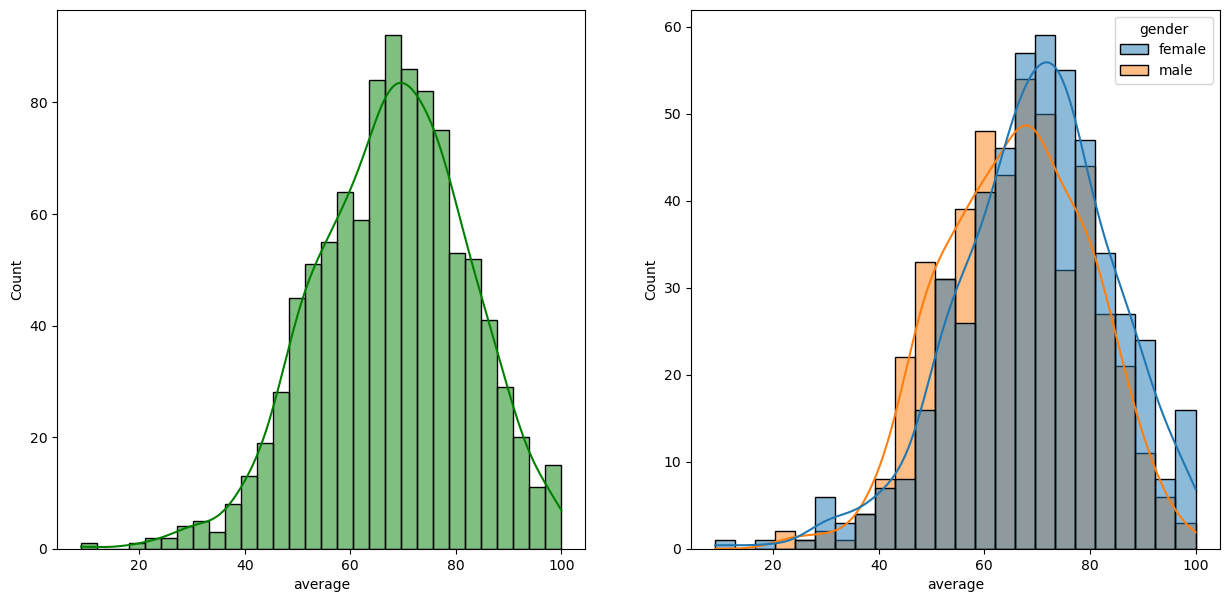

In [89]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average', kde=True , hue='gender')
plt.show()

#### insights 
- females students to perform well then male students

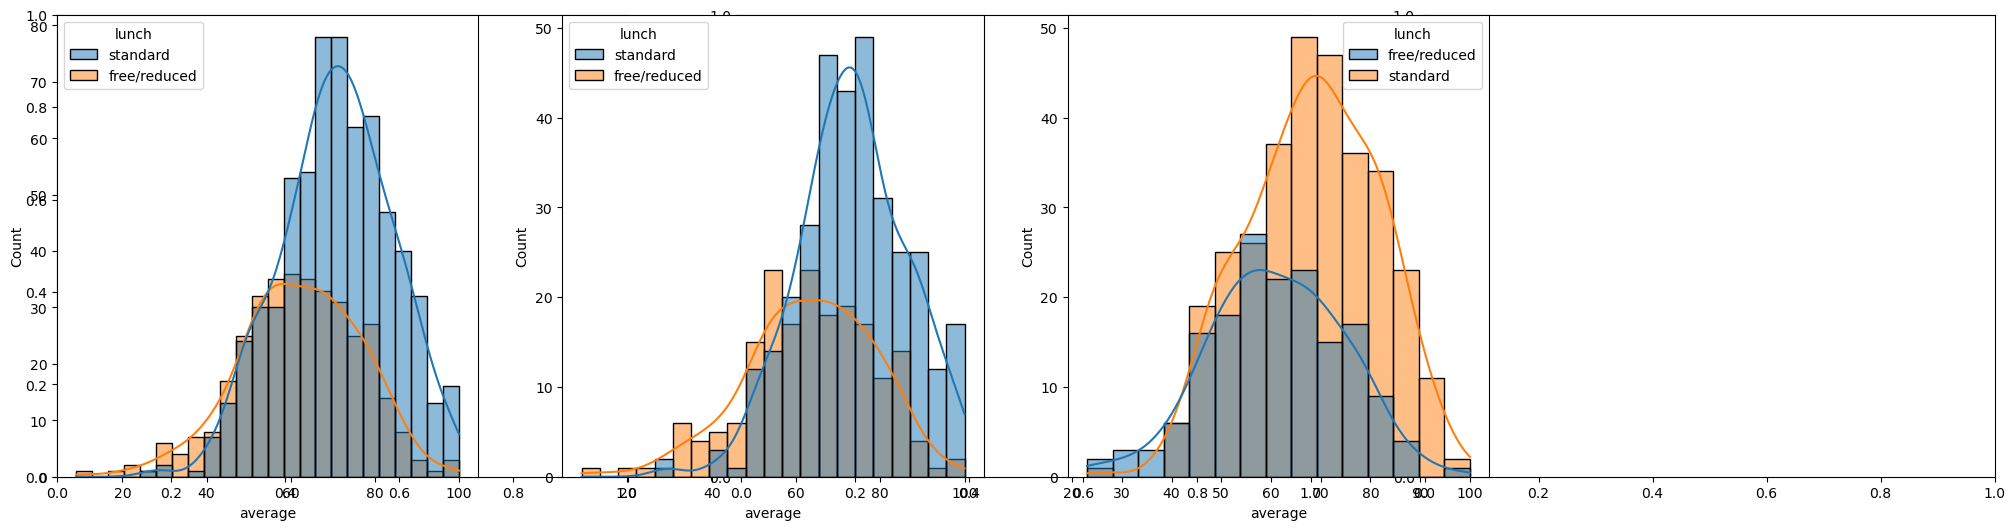

In [91]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

#### insights 
- standard lunch helps perform well in exams
- standard lunch help perform well in exam be it a male or female 

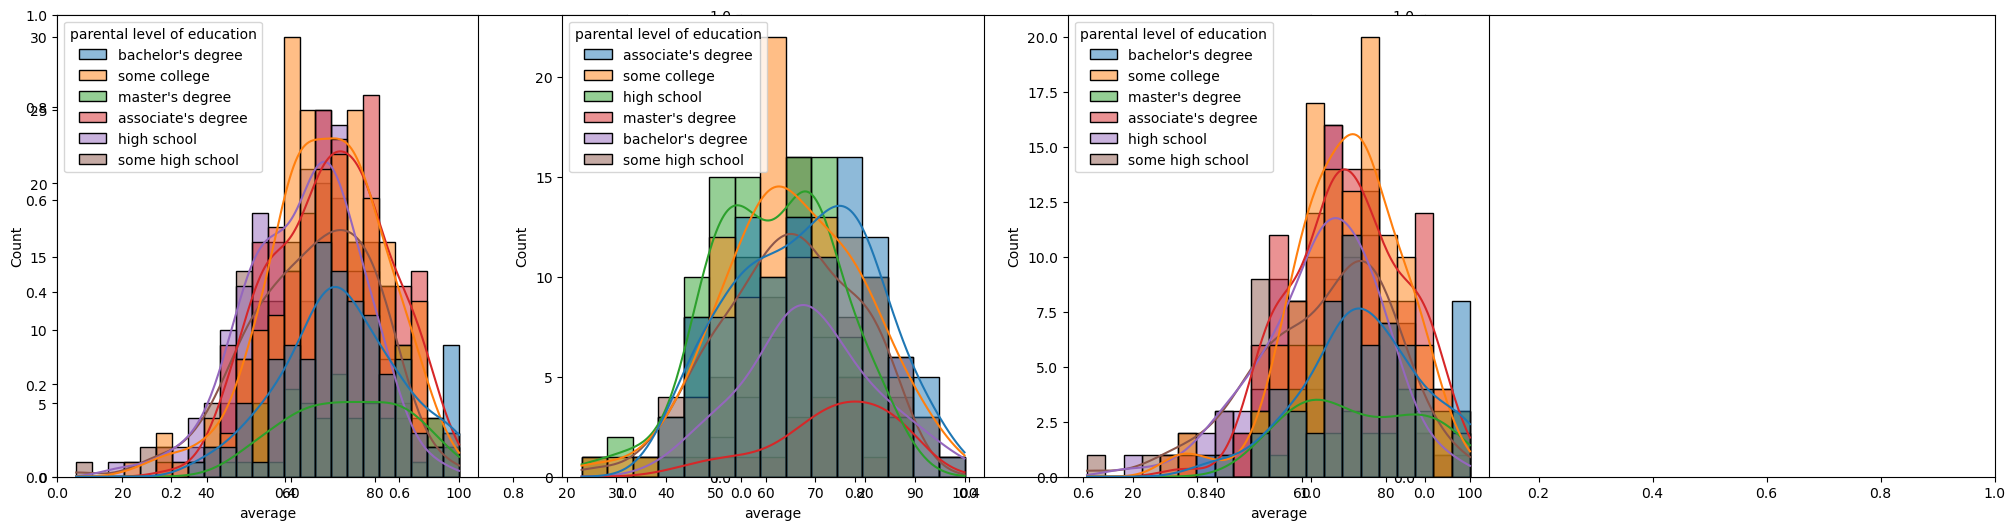

In [92]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.show()

##### insights
- in general parents education dont help student perform well in exam
- 2nd plot shows that parents whose education is of associates degree or masters degree their male child tend to perform well in exam
- 3rd plot we can see there is no eggect of parents education on female students 

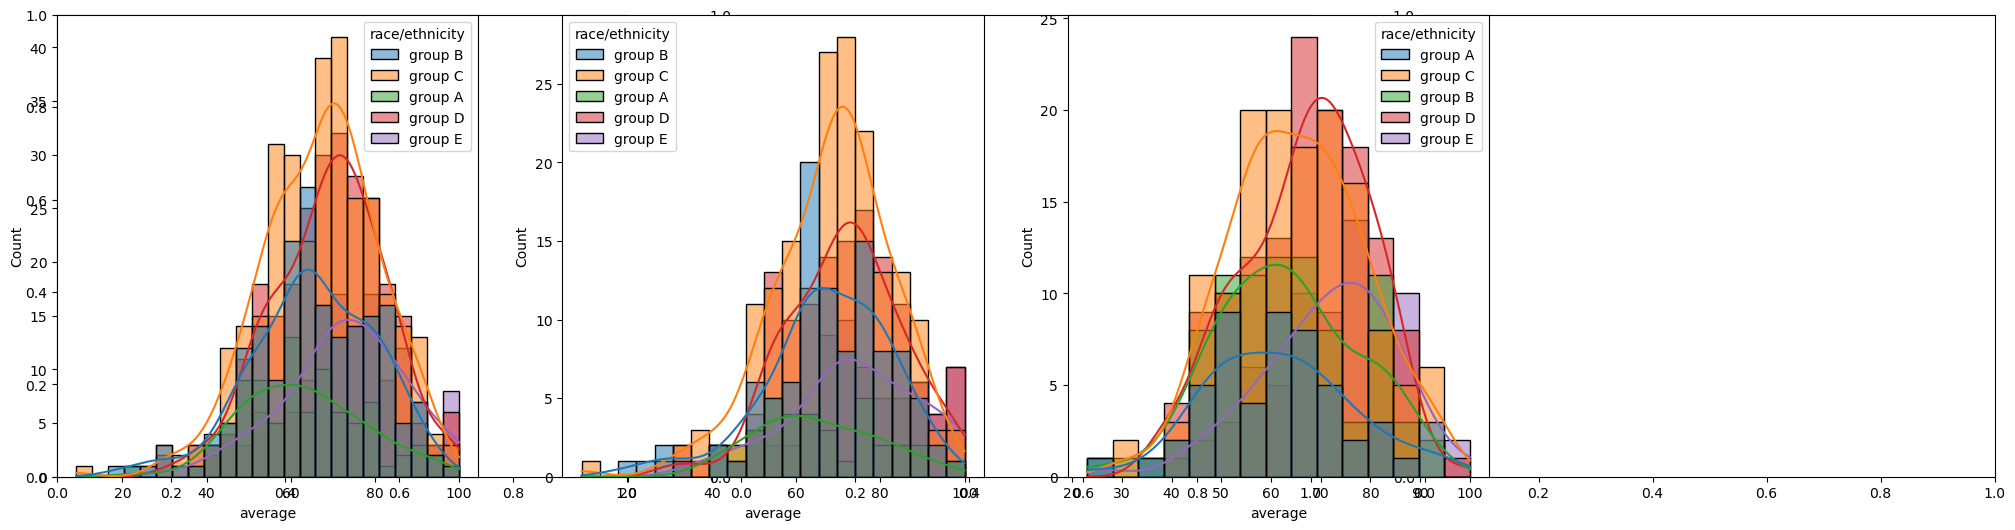

In [93]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

####  insights 
- student of group A and group B tends to perform poorly in eam
- students of group A and group B tends to perform poorly in ecam irrespective of whether they are male or female 

##### Maximum scores of students in all three subjects 

In [94]:
df.head(1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667


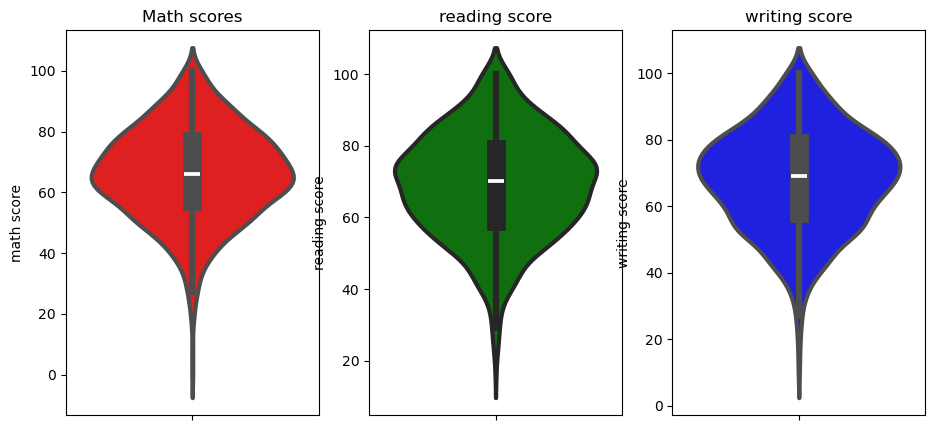

In [126]:
plt.figure(figsize = (15,5))
plt.subplot(1,4,1)
plt.title('Math scores')
sns.violinplot(y= 'math score' , data = df , color = 'red' , linewidth = 3)
plt.subplot(1,4,2)
plt.title('reading score')
sns.violinplot(y= 'reading score' , data = df , color = 'green' , linewidth = 3)
plt.subplot(1,4,3)
plt.title('writing score')
sns.violinplot(y= 'writing score' , data = df , color = 'blue' , linewidth = 3)
plt.show()



##### insights 
- from the above three plots its clearly visible that most of the students score in between 60-80 in maths whaereas in reading and writing most of the score from 50-80

#### univerate analysis

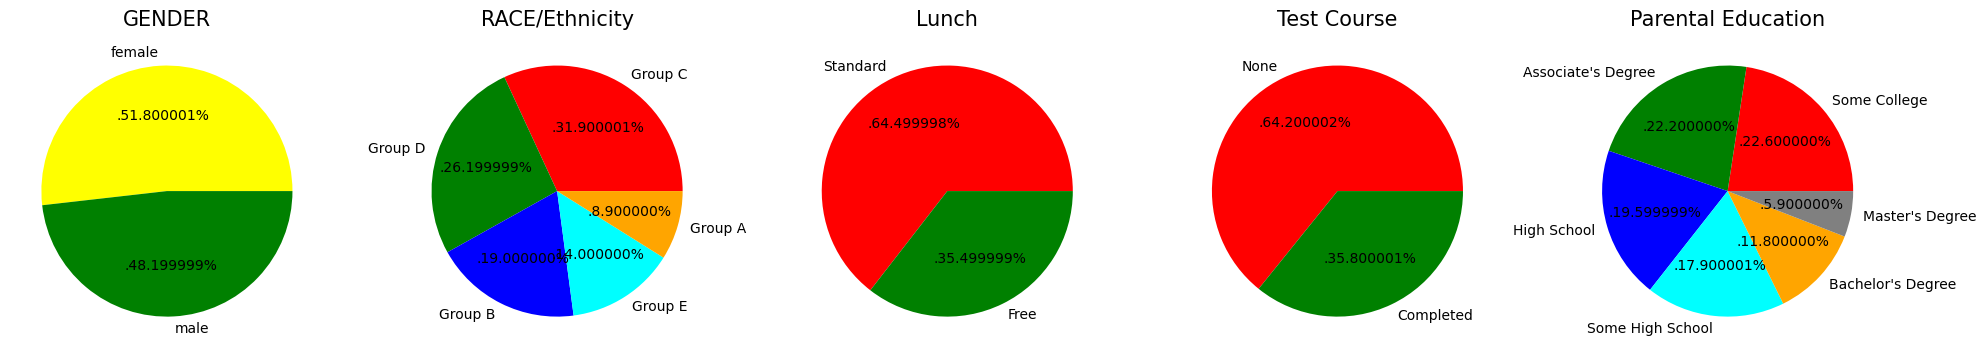

In [149]:
plt.rcParams['figure.figsize'] = (20,12)
plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'female' , 'male'
color = ['yellow' , 'green']


plt.pie(size , colors = color , labels = labels , autopct = '.%2f%%')
plt.title('GENDER' , fontsize = 15)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('RACE/Ethnicity', fontsize = 15)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 15)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 15)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 15)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#### Insights 
- number of male and female students is almost equal
- number of students are greatest in group c
- number of students who have sstandard lunch are greater
- number of student who have not enrolled in any test preparation course in greater
- number of students whore parental education is 'some college' is greater followed closely by 'associate degree'

#### Feature vise visualization 

##### Gender column 
- how is distributioon of gender ?
- is gender has any impact on students performance ?
  

####  univerate analysis (how is distributiob=n of gender)

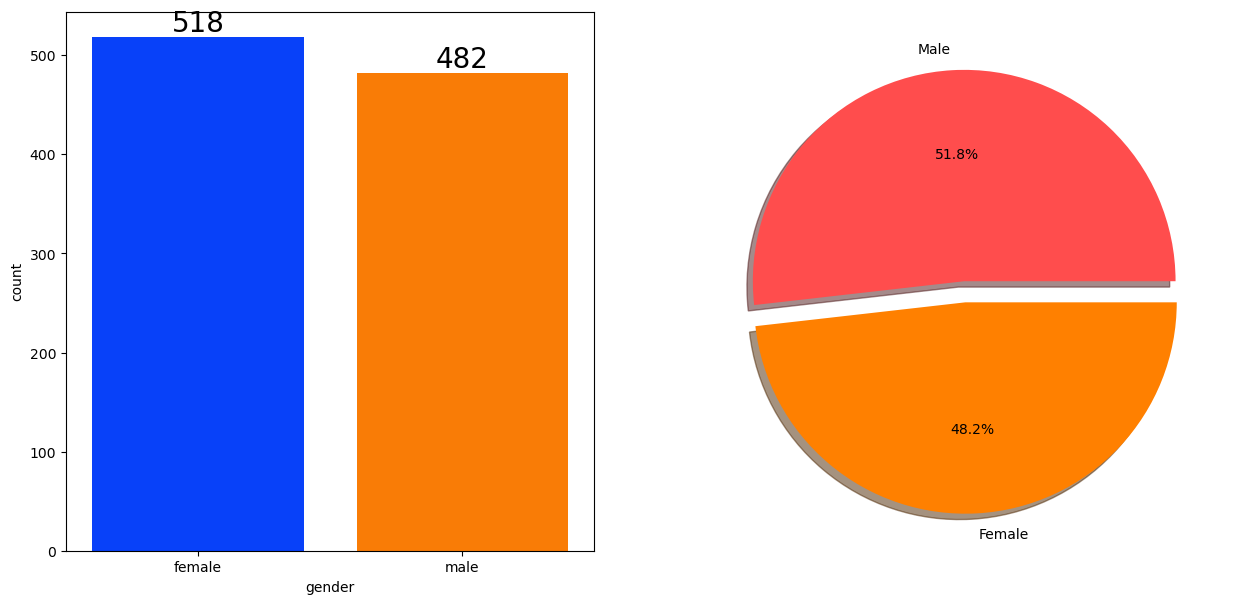

In [152]:
f,ax=plt.subplots(1,2,figsize=(15,7))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### insights 
- gender has balancer data with female students are 518 (48%) and male students are 482(51.8%)

#### Bivariate analusis 

In [170]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group


,math score,reading score,writing score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

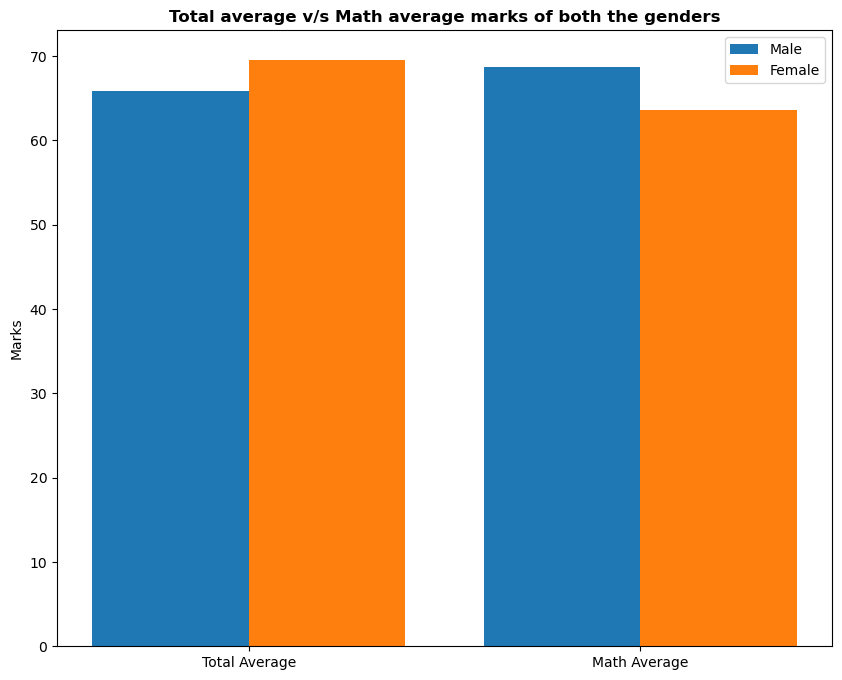

In [171]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

##### insights 
- on average females have a better overall score then men
- whereas males have scored higher in maths 

#### RACE / ETHINITY COLUMN
- How is group wise distribution
- is race/ethinicity has any impact on student perfoermance ?
  

##### univariate analysis ( how is group wise distribution )

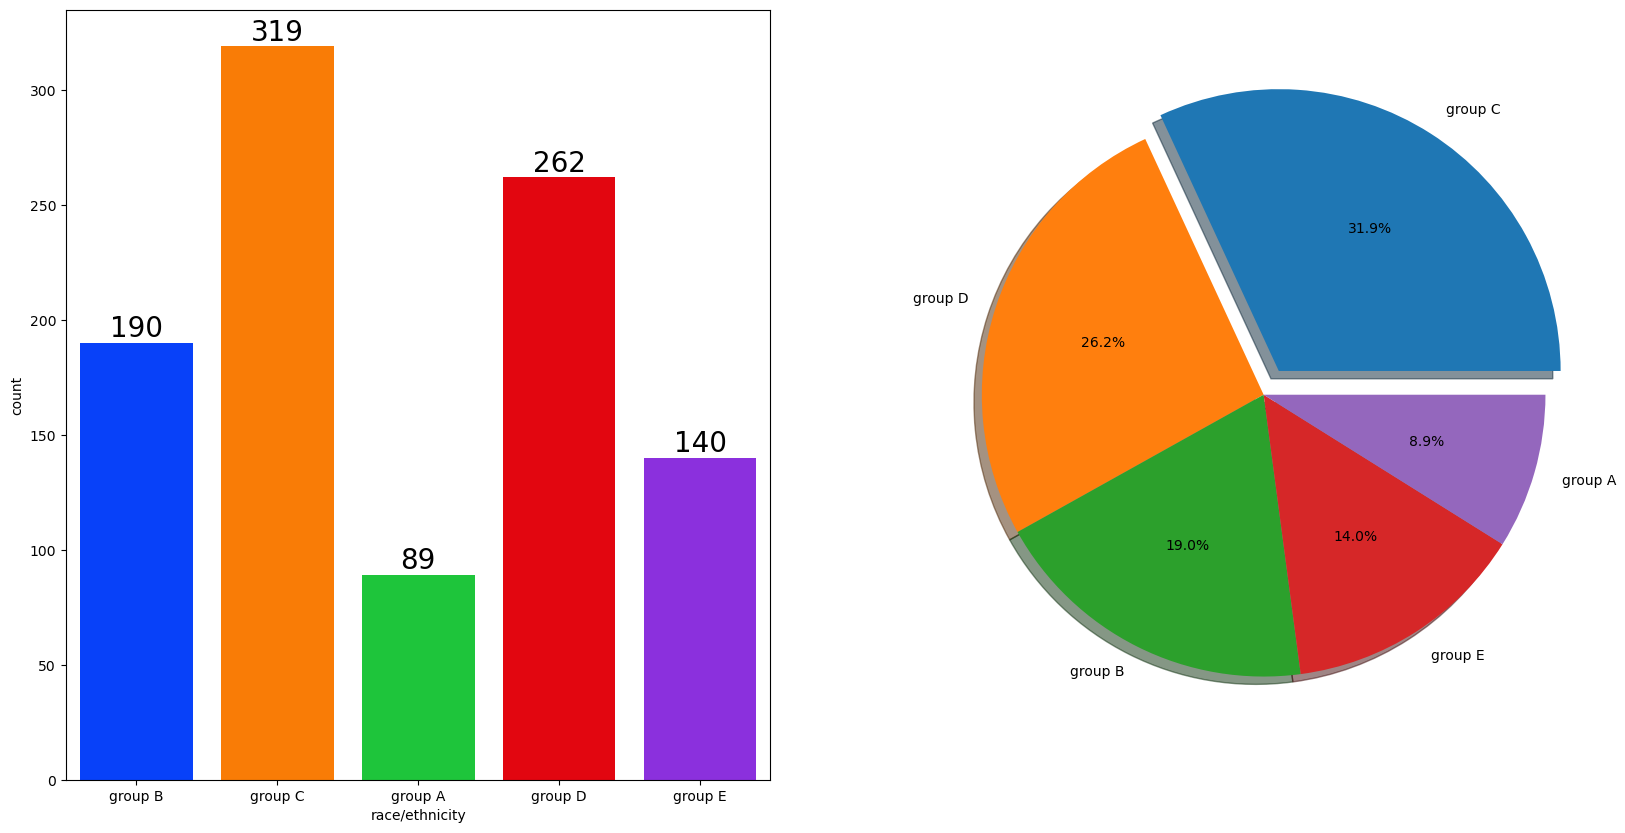

In [172]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

##### insighths 
- most of the student belonging from group c / group D
- lowest numner of students belong to group A
  

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

In [174]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

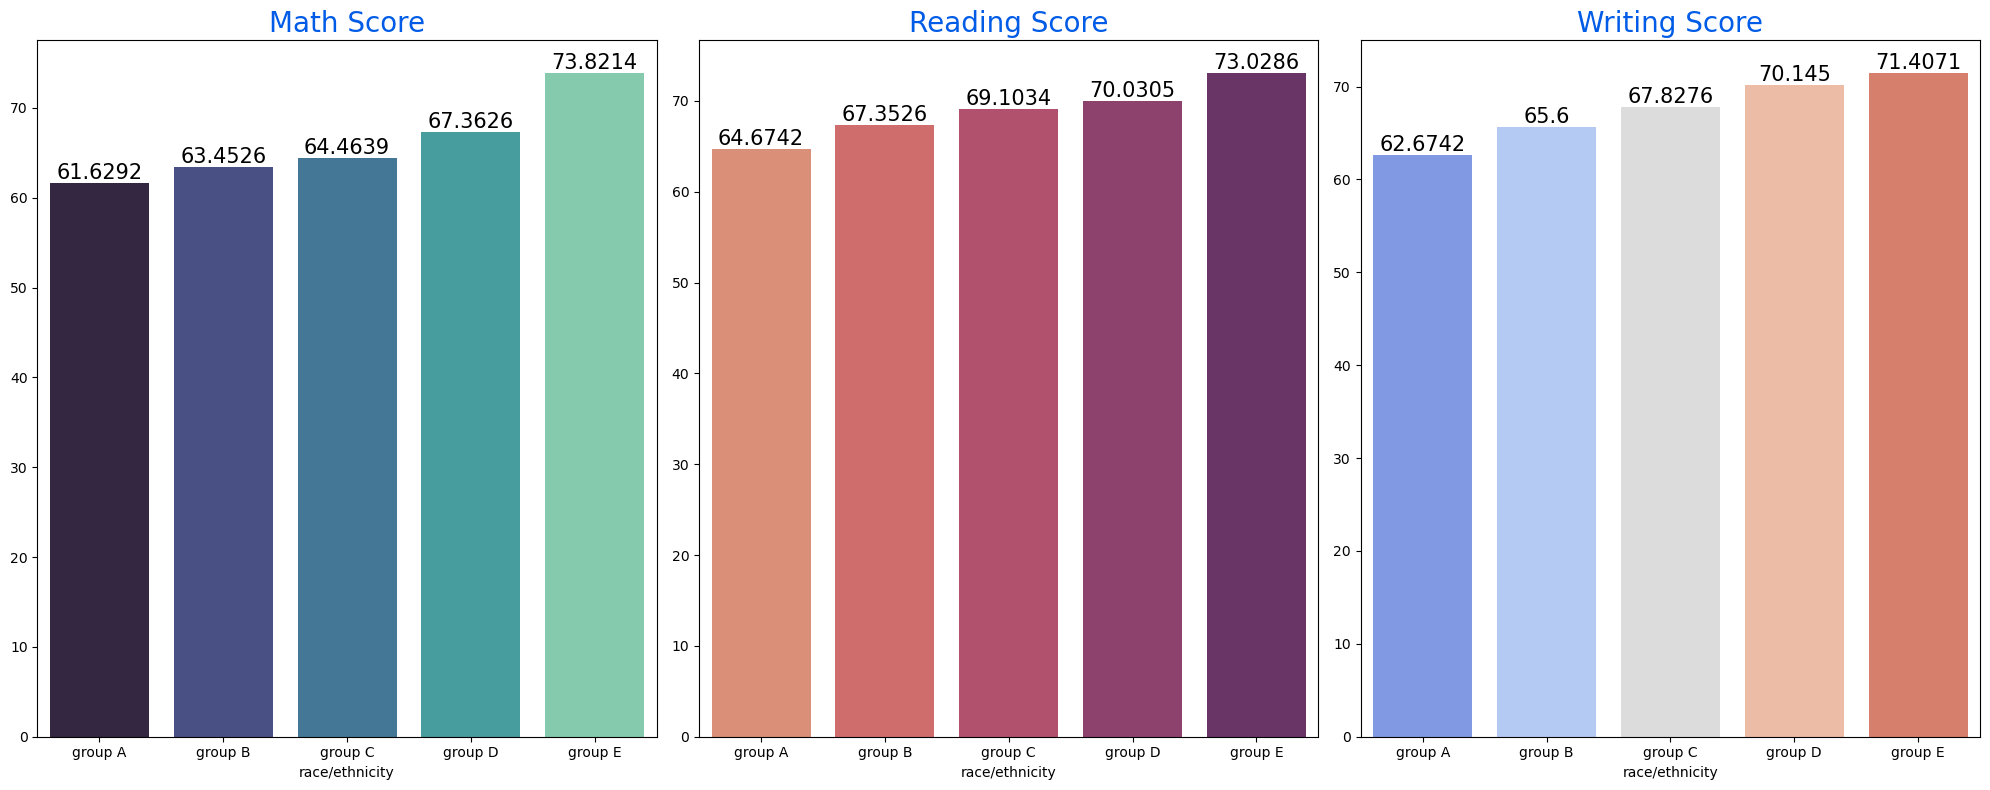

In [178]:
# 1. Grouping race/ethnicity wise average scores
Group_data2 = df.groupby('race/ethnicity')[['math score', 'reading score', 'writing score']].mean()

# 2. Create subplots
fig, ax = plt.subplots(1, 3, figsize=(20, 8))

# 3. Math score bar plot
sns.barplot(x=Group_data2.index, y=Group_data2['math score'].values, palette='mako', ax=ax[0])
ax[0].set_title('Math Score', color='#005ce6', size=20)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

# 4. Reading score bar plot
sns.barplot(x=Group_data2.index, y=Group_data2['reading score'].values, palette='flare', ax=ax[1])
ax[1].set_title('Reading Score', color='#005ce6', size=20)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

# 5. Writing score bar plot
sns.barplot(x=Group_data2.index, y=Group_data2['writing score'].values, palette='coolwarm', ax=ax[2])
ax[2].set_title('Writing Score', color='#005ce6', size=20)
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)

plt.tight_layout()
plt.show()

##### insights 
- group E studetns have scored the highest marks
- group A students have scroed the lowers marks
- student from a lower socioeconomic status have a lower avg in all course subjects 

#### Parental level of education colummn 
- what is education backgrouu d of students parent ?
- is parental education has any impact on studetns performance ? 

####  #### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

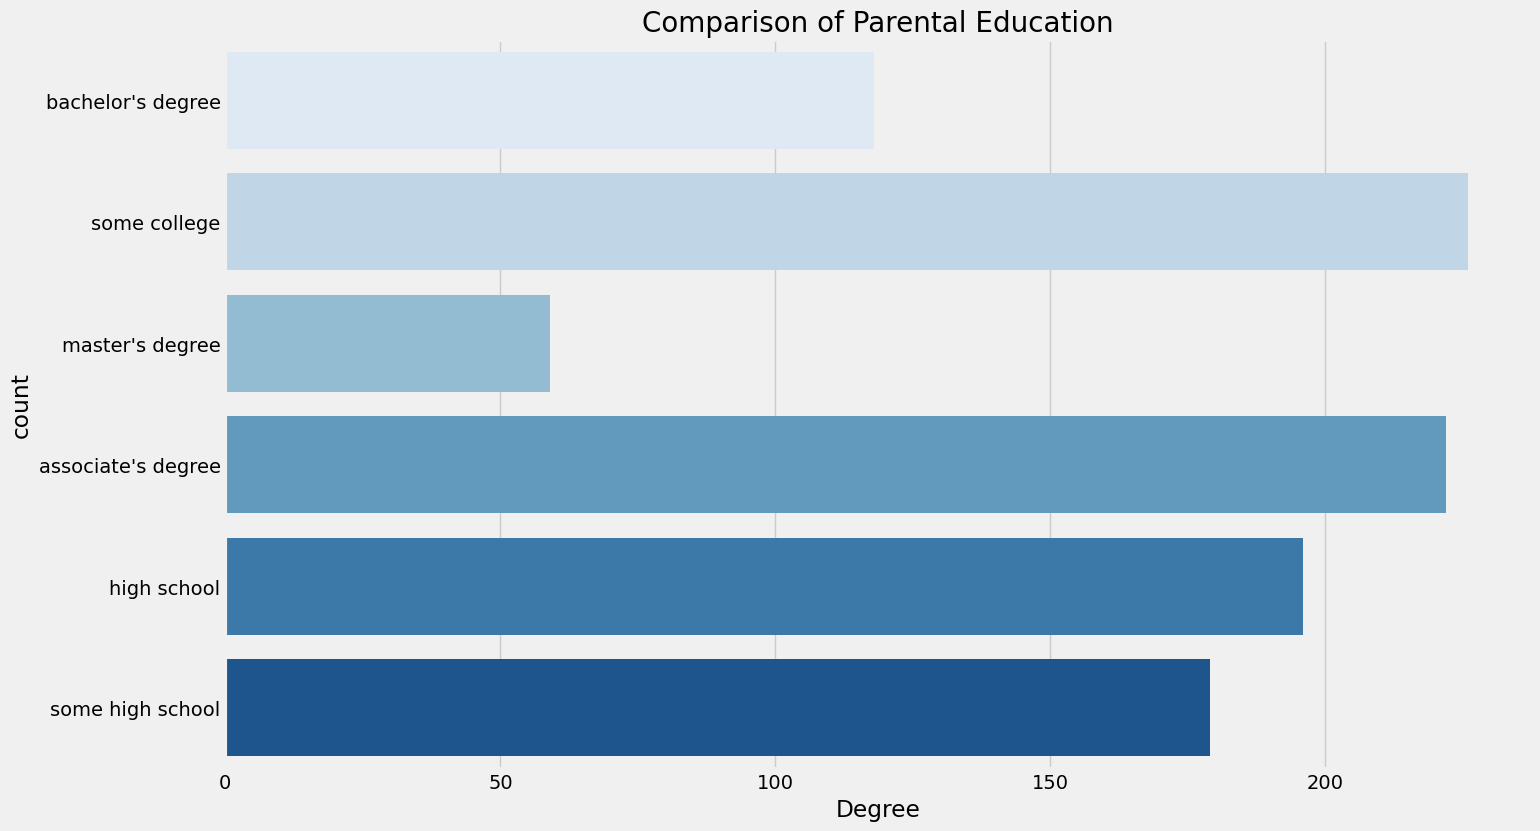

In [179]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

##### insights 
- largest numner of parents are from some college 

 #### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

In [180]:
df.head(1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667


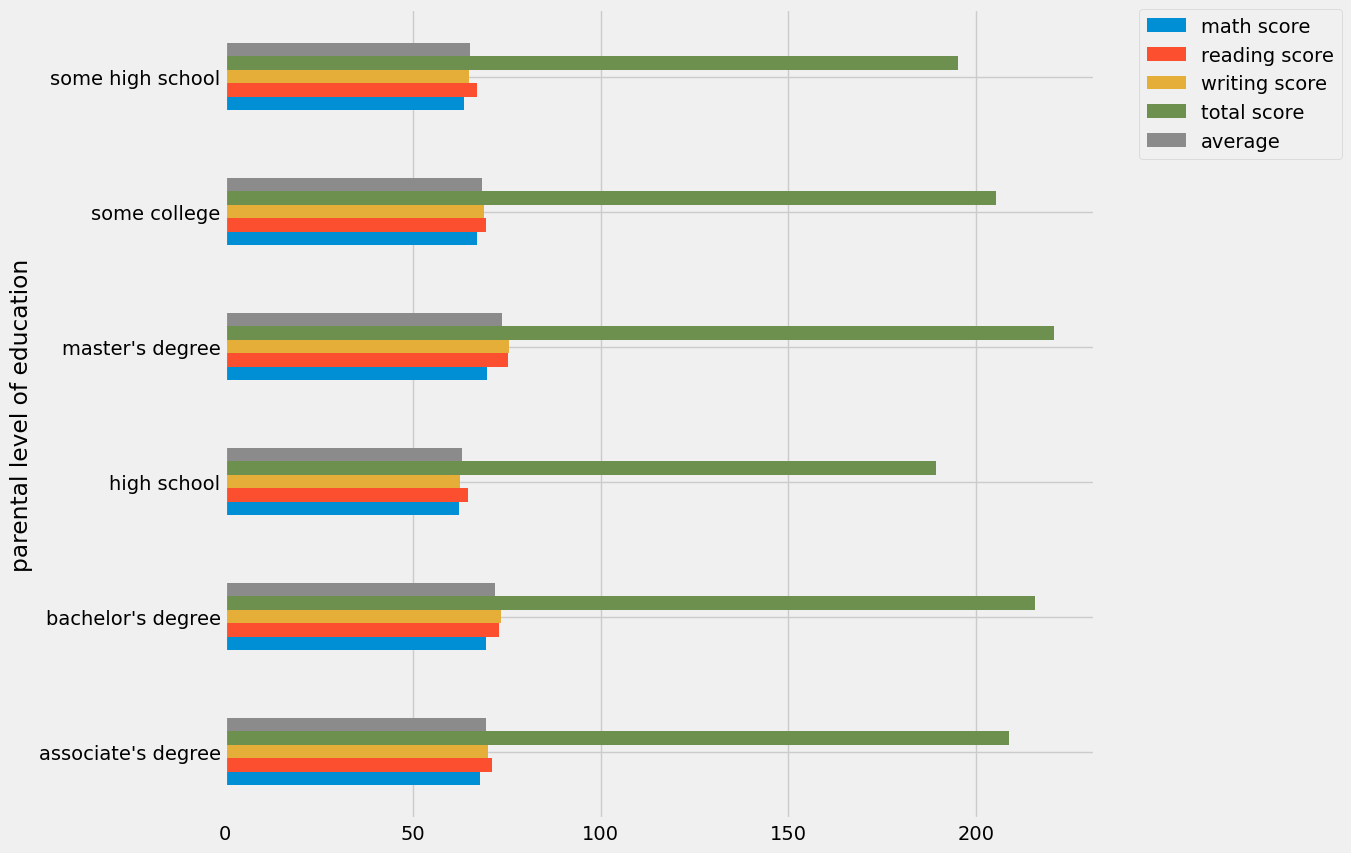

In [191]:


numeric_cols = df.select_dtypes(include='number').columns
df.groupby('parental level of education')[numeric_cols].mean().plot(kind='barh', figsize=(10, 10))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


##### Insights 
- the score of stident whose partents posses maskter and bachelor level education , level education are higher then others 

#### Lunch coloumn
- which type of lunch is most commmon amout students ?
- what is the effect of lunch tpe on test reults ?

#### #### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

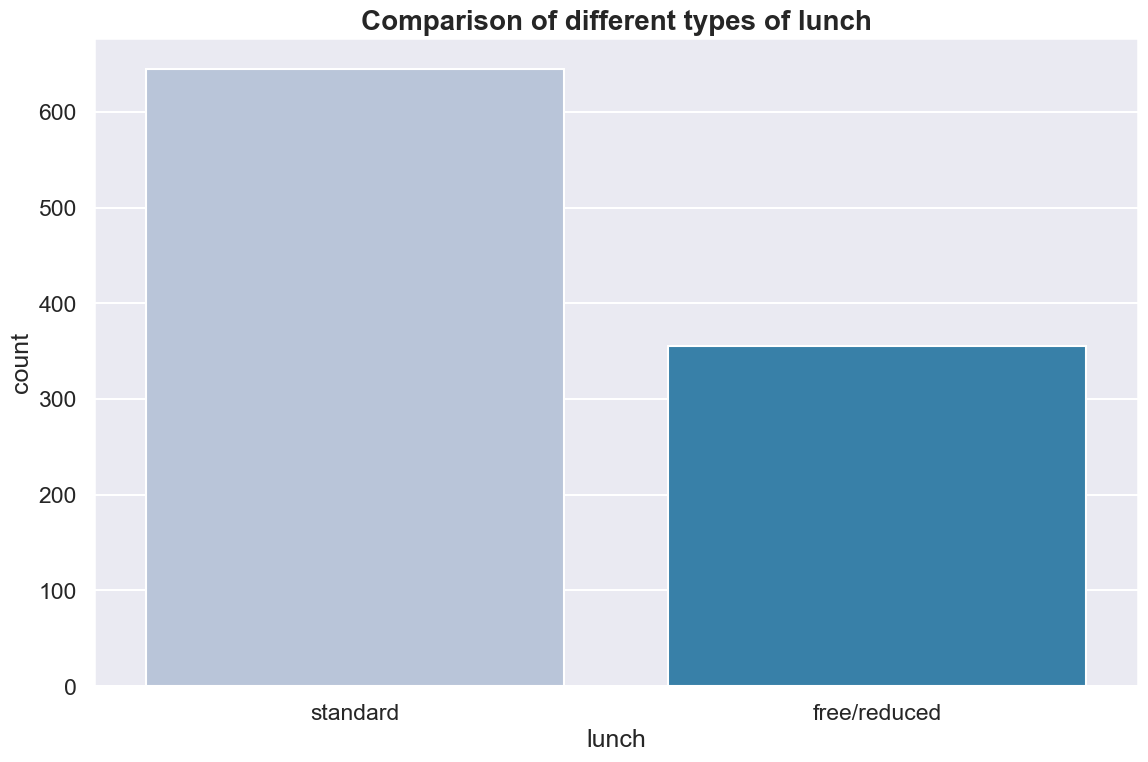

In [194]:
sns.set_style('darkgrid')     # For background grid lines
sns.set_context('talk')       # Bigger font for presentations

# Optional: Increase figure size globally
plt.rcParams['figure.figsize'] = (12, 8)

# Now create your plot
sns.countplot(data=df, x='lunch', palette='PuBu')
plt.title('Comparison of different types of lunch', fontsize=20, fontweight='bold')
plt.show()

#### insights 
- students being served standard lunch was more hen free lunch 

####  BIVARIATE ANALYSIS (  Is lunch type intake has any impact on student's performance ? )

In [205]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20) 

In [197]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


### insights 
-- student have completed the test preprattion course have scores hight in all three categoees than those who havent taken the course 

### check the outliers 

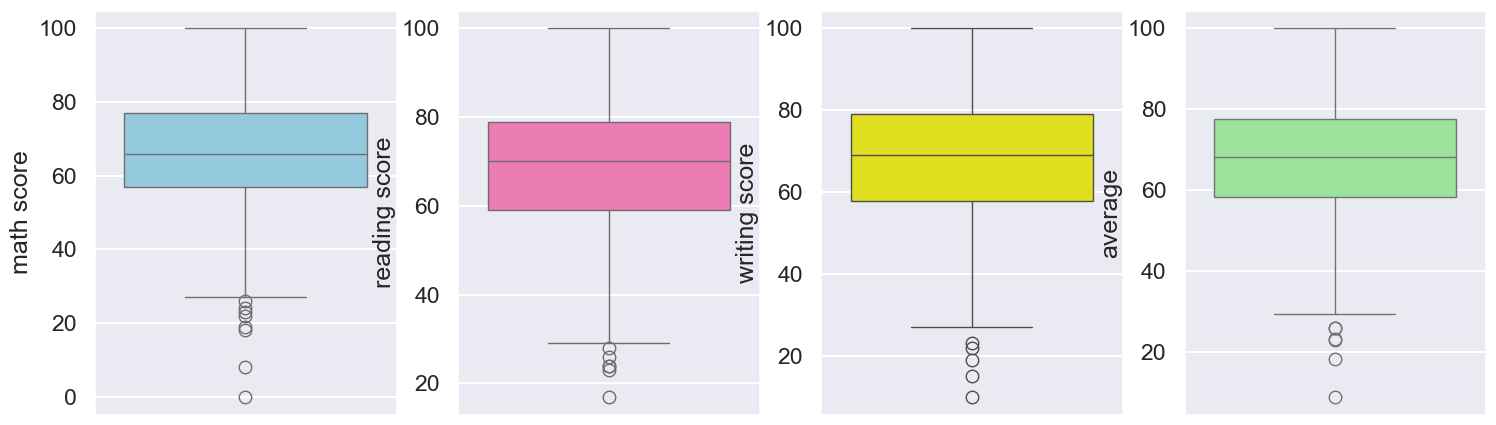

In [199]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

### multivate analaysis using pair plot 

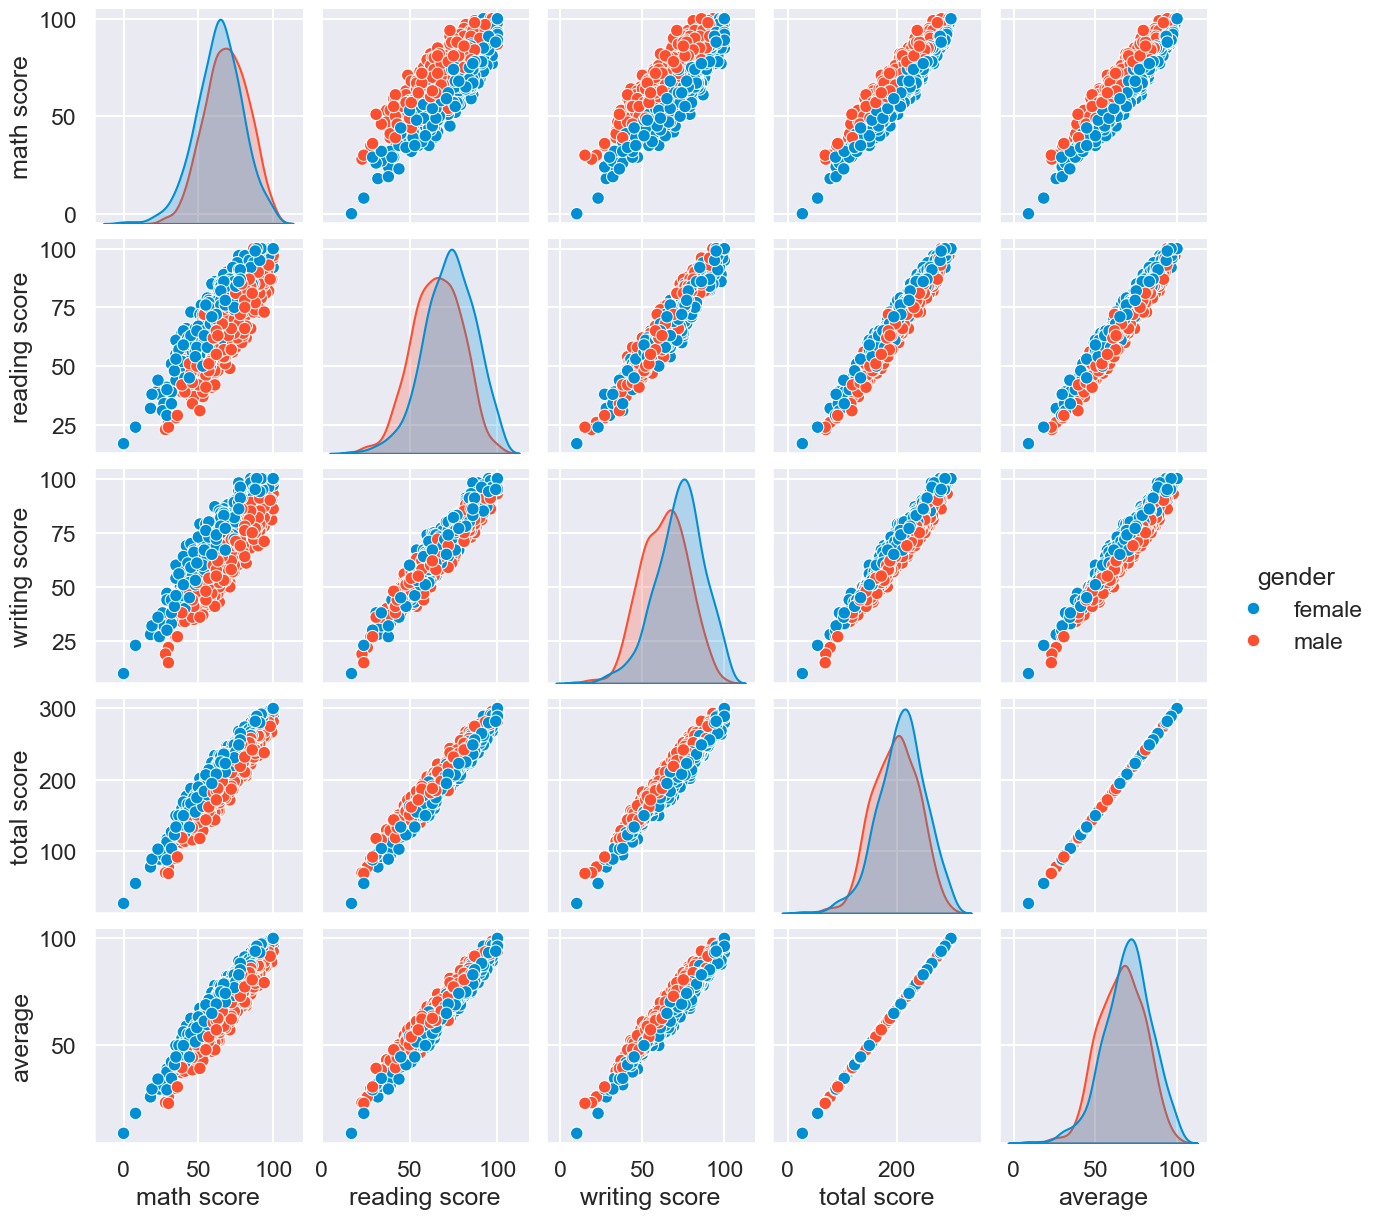

In [204]:
sns.pairplot(df,hue = 'gender')
plt.show()